# How can we predict the prevalence of undernourishment in Albania thereby offering a comprehensive evaluation of the country's food security status, utilizing a comprehensive dataset encompassing economic factors, environmental factors, agricultural dynamics and  sociopolitical factors? Is it increasing or decreasing over the years? What is the most contributing factor?



Link to dataset: https://drive.google.com/file/d/1COXjVdhdiIFmNVsFqpWGgOPWkcj2VBEk/view?usp=sharing 

### Project Background and Objective

Food security is not just about having enough food; it's about ensuring that all people have consistent access to sufficient, safe, and nutritious food that meets their dietary needs for an active and healthy life. In Albania, this is a multifaceted challenge influenced by various factors, including agricultural productivity, economic stability, environmental conditions, and sociopolitical dynamics.

The country's food security is intricately linked to its ability to produce food locally, manage environmental resources, sustain economic growth, and maintain sociopolitical stability. These diverse elements form the backbone of our study."

#### Problem Statement:
"Our project aims to predict the prevalence of undernourishment in Albania, offering a comprehensive evaluation of the country's food security status. We're using a detailed dataset that encapsulates a wide range of factors, from economic and environmental conditions to agricultural dynamics and sociopolitical indicators. By examining these diverse elements, we can gain a holistic understanding of the factors that contribute to food security in Albania and identify key areas for intervention and improvement."

"Think of food security as a three-legged stool, with each leg representing a crucial aspect: availability (sufficient food supply), access (economic and physical access to food), and utilization (the proper use of food based on knowledge of basic nutrition and care). In the case of Albania, we're exploring how these aspects are influenced by local and global factors such as agricultural productivity, climate change, economic policies, and political stability. Our predictive model is designed to unravel these complex interactions and provide insights into how Albania can strengthen food security and which "leg" to tackle."

### Data Description

The "Albania 2D DDW Dataset" is a comprehensive collection of socio-economic, environmental, and political indicators for Albania. Spanning multiple years, the dataset provides a detailed snapshot of the country's demographic, climatic, agricultural, and economic conditions.

Key Features:

Temporal Coverage: Data is structured as a time series, with each row corresponding to a specific year.

Population Data: Includes annual population figures, crucial for demographic studies.

Environmental Indicators: Forest area (percentage of land area) and annual precipitation (mm) offer insights into Albania's environmental conditions.

Agricultural Data: Detailed information on crop areas, production, yield, and pesticide use highlights agricultural trends.

Economic Indicators: GDP per capita, inflation rates, and food export values provide an economic perspective.

Food Security and Health: Data on undernourishment prevalence and cereal import dependency ratio shed light on food security issues.

Climate Data: Annual mean temperature data is included, important for climate-related studies.
Political Stability: An indicator measuring political stability and the absence of violence or terrorism.

Disaster Data: Information on annual flood magnitude complements environmental analyses.

#### Meta Data
##### pop- Annual population (people)
forest- Forest area (% of land area)
(Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems (for example, in fruit plantations and agroforestry systems) and trees in urban parks and gardens.)

##### undern- Prevalence of undernourishment (% of population)
(Prevalence of undernourishments is the percentage of the population whose habitual food consumption is insufficient to provide the dietary energy levels that are required to maintain a normal active and healthy life. Data showing as 2.5 may signify a prevalence of undernourishment below 2.5%.)

##### temp- Annual Mean temperature (Degree Celsius)

##### pol- Political Stability and Absence of Violence/Terrorism: Percentile Rank, Upper Bound of 90% Confidence Interval
(Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism.  Percentile rank indicates the country's rank among all countries covered by the aggregate indicator, with 0 corresponding to lowest rank, and 100 to highest rank.  Percentile ranks have been adjusted to correct for changes over time in the composition of the countries covered by the WGI.  Percentile Rank Upper refers to upper bound of 90 percent confidence interval for governance, expressed in percentile rank terms.)

##### inf- Inflation, consumer prices (annual %)
(Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.)

##### exp-Annual Food Export (US$ Thousand)

##### crop_area_t- Annual Field crop area (Ha)

##### crop_area_f- Annual field crop area for forage (Ha)

##### crop_pro_t- Annual field crop production (tonnes)

##### crop_pro_f- Annual forage field crop production(tonnes)

##### crop_y- annual crop yield (hg/ha)

##### pes- Annual use of pesticides (tonnes)

##### prep- Annual Precipitation (mm per year)

##### gdp- Gross domestic product (GDP) per capita in Albania (US dollars)

##### import- Cereal import dependency ratio 

##### flood- Average Annual Flood magnitude (km^2)

### Data Cleaning

In [1]:
#importing the neccessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.svm import SVR
# import xgboost as xgb
from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load in data and create workfile
df = pd.read_csv('Albania_2d.csv')
df

,year,pop,forest,undern,temp,pol,inf,exp,crop_area_t,crop_area_f,crop_pro_t,crop_pro_f,crop_y,pes,prep,gdp,import,flood
0,1988,3263019,NaN,NaN,11.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.88,805.05,NaN,NaN
1,1989,3282182,NaN,NaN,11.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1072.01,860.78,NaN,NaN
2,1990,3295066,28.788321,NaN,12.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176310.0,726.00,958.69,675.74,NaN,NaN
3,1991,3302081,28.717153,NaN,11.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168855.0,726.00,1143.45,408.02,NaN,NaN
4,1992,3303739,28.645985,NaN,11.82,NaN,226.005421,NaN,NaN,NaN,NaN,NaN,180438.0,726.00,985.30,259.75,NaN,5620.00
5,1993,3300711,28.574818,NaN,11.78,NaN,85.004751,NaN,NaN,NaN,NaN,NaN,202391.0,605.00,1081.49,452.62,NaN,NaN
6,1994,3293999,28.503650,NaN,12.75,NaN,22.565053,NaN,NaN,NaN,NaN,NaN,139924.0,804.00,924.33,736.03,NaN,NaN
7,1995,3284364,28.432482,NaN,11.59,NaN,7.793219,NaN,NaN,NaN,NaN,NaN,183117.0,1004.00,1386.94,903.99,NaN,78.00
8,1996,3271331,28.361314,NaN,11.33,57.446808,12.725478,9244.90000,NaN,NaN,NaN,NaN,175963.0,1255.84,1495.28,1009.97,NaN,NaN
9,1997,3253719,28.290146,NaN,11.57,NaN,33.180274,8889.75700,NaN,NaN,NaN,NaN,183020.0,1507.72,967.05,717.38,NaN,NaN


In [4]:
# Find the columns in the dataset
df.columns

Index(['year', ' pop', 'forest', 'undern', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood'],
      dtype='object')

In [5]:
# Check for missing values
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         35 non-null     int64  
 1    pop         35 non-null     int64  
 2   forest       32 non-null     float64
 3   undern       20 non-null     float64
 4   temp         35 non-null     float64
 5   pol          24 non-null     float64
 6   inf          31 non-null     float64
 7   exp          26 non-null     float64
 8   crop_area_t  25 non-null     float64
 9   crop_area_f  25 non-null     float64
 10  crop_pro_t   25 non-null     float64
 11  crop_pro_f   25 non-null     float64
 12  crop_y       23 non-null     float64
 13  pes          23 non-null     float64
 14  prep         33 non-null     float64
 15  gdp          35 non-null     float64
 16  import       17 non-null     float64
 17  flood        9 non-null      float64
dtypes: float64(16), int64(2)
memory usage: 5.0 KB
None
y

Since there are missing values, we will impute the missing values using the mean of each column. Imputing missing values using the mean of each column is a suitable method for our dataset due to its relatively small size and simplicity. This approach helps maintain the overall distribution of the data while ensuring that the complete dataset can be utilized for further analysis. It's an efficient way to handle missing values, especially in datasets where the missingness is random and does not constitute a significant proportion of the data.

In [6]:
# Impute missing values using mean
df_imputed = df.fillna(df.mean())
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         35 non-null     int64  
 1    pop         35 non-null     int64  
 2   forest       35 non-null     float64
 3   undern       35 non-null     float64
 4   temp         35 non-null     float64
 5   pol          35 non-null     float64
 6   inf          35 non-null     float64
 7   exp          35 non-null     float64
 8   crop_area_t  35 non-null     float64
 9   crop_area_f  35 non-null     float64
 10  crop_pro_t   35 non-null     float64
 11  crop_pro_f   35 non-null     float64
 12  crop_y       35 non-null     float64
 13  pes          35 non-null     float64
 14  prep         35 non-null     float64
 15  gdp          35 non-null     float64
 16  import       35 non-null     float64
 17  flood        35 non-null     float64
dtypes: float64(16), int64(2)
memory usage: 5.0 KB


In [7]:
# Visualise the df_imputed and check again for missing values
display(df_imputed)
print(df_imputed.isna().sum())

,year,pop,forest,undern,temp,pol,inf,exp,crop_area_t,crop_area_f,crop_pro_t,crop_pro_f,crop_y,pes,prep,gdp,import,flood
0,1988,3263019,28.510687,6.005,11.95,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,248327.652174,2587.94087,1068.880000,805.05,44.141176,8576.792222
1,1989,3282182,28.510687,6.005,11.55,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,248327.652174,2587.94087,1072.010000,860.78,44.141176,8576.792222
2,1990,3295066,28.788321,6.005,12.28,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,176310.000000,726.00000,958.690000,675.74,44.141176,8576.792222
3,1991,3302081,28.717153,6.005,11.23,57.646151,15.061021,46226.991165,206958.12,196296.08,1738560.32,5697353.8,168855.000000,726.00000,1143.450000,408.02,44.141176,8576.792222
4,1992,3303739,28.645985,6.005,11.82,57.646151,226.005421,46226.991165,206958.12,196296.08,1738560.32,5697353.8,180438.000000,726.00000,985.300000,259.75,44.141176,5620.000000
5,1993,3300711,28.574818,6.005,11.78,57.646151,85.004751,46226.991165,206958.12,196296.08,1738560.32,5697353.8,202391.000000,605.00000,1081.490000,452.62,44.141176,8576.792222
6,1994,3293999,28.503650,6.005,12.75,57.646151,22.565053,46226.991165,206958.12,196296.08,1738560.32,5697353.8,139924.000000,804.00000,924.330000,736.03,44.141176,8576.792222
7,1995,3284364,28.432482,6.005,11.59,57.646151,7.793219,46226.991165,206958.12,196296.08,1738560.32,5697353.8,183117.000000,1004.00000,1386.940000,903.99,44.141176,78.000000
8,1996,3271331,28.361314,6.005,11.33,57.446808,12.725478,9244.900000,206958.12,196296.08,1738560.32,5697353.8,175963.000000,1255.84000,1495.280000,1009.97,44.141176,8576.792222
9,1997,3253719,28.290146,6.005,11.57,57.646151,33.180274,8889.757000,206958.12,196296.08,1738560.32,5697353.8,183020.000000,1507.72000,967.050000,717.38,44.141176,8576.792222


year           0
 pop           0
forest         0
undern         0
temp           0
pol            0
inf            0
exp            0
crop_area_t    0
crop_area_f    0
crop_pro_t     0
crop_pro_f     0
crop_y         0
pes            0
prep           0
gdp            0
import         0
flood          0
dtype: int64


In [8]:
##checking for categorical variables
columns= ['year', ' pop', 'forest', 'undern', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood']
for column in df_imputed:
    num_categories = df[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")

Number of categories in year: 35
Number of categories in  pop: 35
Number of categories in forest: 29
Number of categories in undern: 17
Number of categories in temp: 31
Number of categories in pol: 22
Number of categories in inf: 31
Number of categories in exp: 26
Number of categories in crop_area_t: 25
Number of categories in crop_area_f: 25
Number of categories in crop_pro_t: 25
Number of categories in crop_pro_f: 25
Number of categories in crop_y: 23
Number of categories in pes: 21
Number of categories in prep: 33
Number of categories in gdp: 35
Number of categories in import: 16
Number of categories in flood: 9


There seem to be no categorical variables, hence encoding will not be performed.

### Data Visualisation and Analyses

In [9]:
# To find the summary statistics for all of the numerical variables in the dataset
df_imputed.describe()

,year,pop,forest,undern,temp,pol,inf,exp,crop_area_t,crop_area_f,crop_pro_t,crop_pro_f,crop_y,pes,prep,gdp,import,flood
count,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0000,35.000000,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2005.000000,3.063852e+06,28.510687,6.005000,12.428857,57.646151,15.061021,46226.991165,206958.1200,196296.080000,1.738560e+06,5.697354e+06,248327.652174,2587.940870,1231.348485,2790.067429,44.141176,8576.792222
std,10.246951,1.761920e+05,0.230315,1.220047,0.588441,6.976556,39.758701,34071.068434,17722.0769,18403.825664,3.107865e+05,7.954551e+05,58744.031171,1231.142892,220.927459,1949.200966,3.640706,2656.594302
min,1988.000000,2.842321e+06,28.076642,3.900000,11.230000,42.995171,0.050018,7276.469000,183352.0000,145743.000000,1.297046e+06,3.843948e+06,139924.000000,605.000000,856.310000,259.750000,37.800000,78.000000
25%,1996.500000,2.885558e+06,28.332974,5.050000,12.015000,52.843601,1.962141,28775.629500,198466.0000,194542.500000,1.385948e+06,5.209500e+06,212281.000000,1885.500000,1082.135000,882.385000,42.970588,8576.792222
50%,2005.000000,3.032634e+06,28.510687,6.005000,12.540000,57.646151,2.932682,41861.054000,204142.0000,196296.080000,1.738560e+06,5.697354e+06,248327.652174,2587.940870,1177.150000,2673.770000,44.141176,8576.792222
75%,2013.500000,3.258369e+06,28.733832,6.005000,12.880000,60.849056,13.893250,46226.991165,206958.1200,207969.500000,1.906333e+06,6.024000e+06,254956.326087,3167.860000,1389.860000,4393.080000,44.141176,8576.792222
max,2022.000000,3.303739e+06,28.802464,8.900000,13.430000,74.285713,226.005421,154831.192800,274120.0000,225024.000000,2.333808e+06,7.170585e+06,380935.000000,5244.680000,1893.460000,6657.640000,51.700000,16543.100000


In [10]:
# Check skewness in numerical variables 
skewness = df_imputed.skew()
print(skewness)

year           0.000000
 pop           0.183123
forest        -0.263501
undern         0.927517
temp          -0.397047
pol            0.286001
inf            4.806722
exp            1.610245
crop_area_t    2.173712
crop_area_f   -0.940555
crop_pro_t     0.270997
crop_pro_f     0.191338
crop_y         0.642295
pes            0.267789
prep           0.742834
gdp            0.257793
import         0.337018
flood         -0.992640
dtype: float64


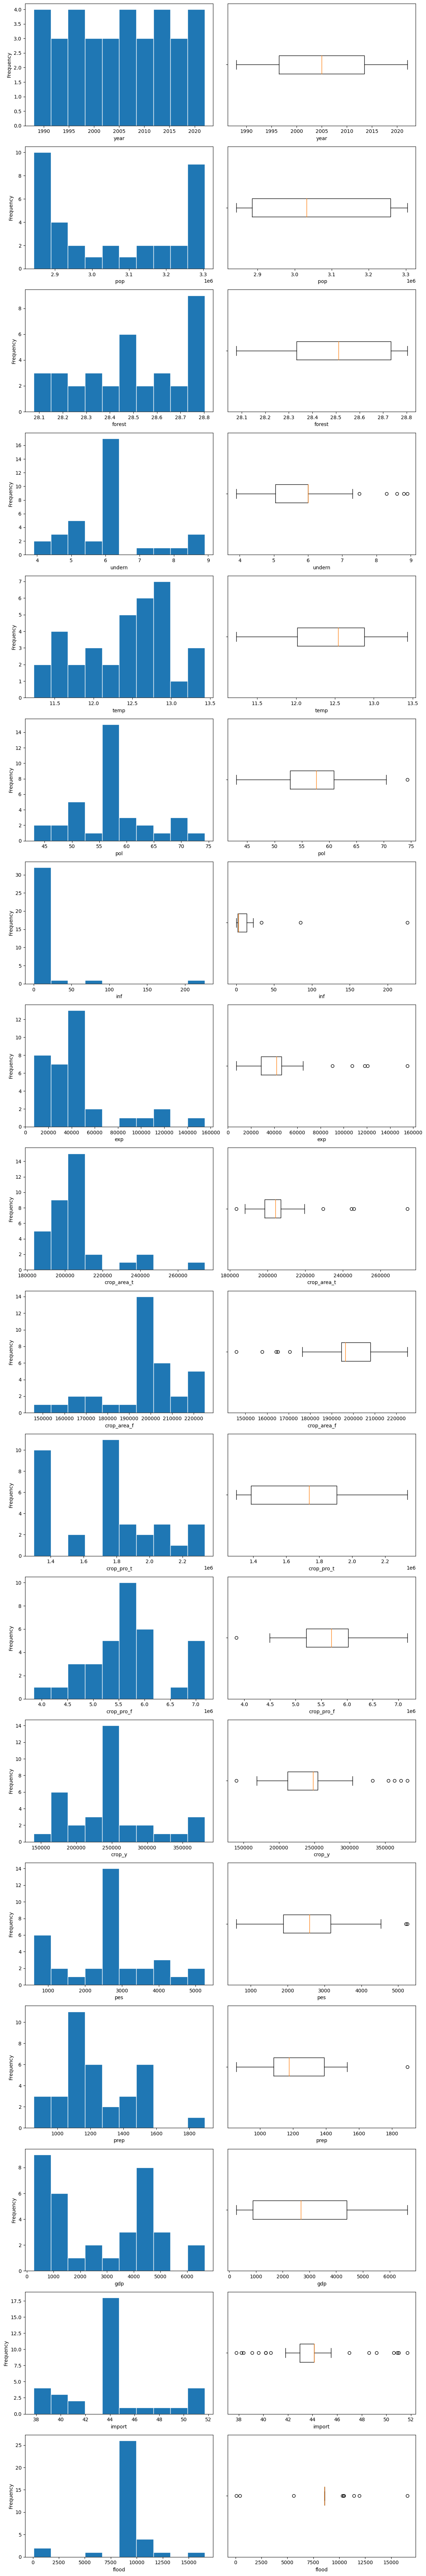

In [11]:
# Define the numerical variables
numerical_vars = ['year', ' pop', 'forest', 'undern', 'temp', 'pol', 'inf', 'exp',
       'crop_area_t', 'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y',
       'pes', 'prep', 'gdp', 'import', 'flood']
# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars), 2, figsize=(12, 4 * len(numerical_vars)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Plot histogram
    axs[i, 0].hist(df_imputed[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(df_imputed[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


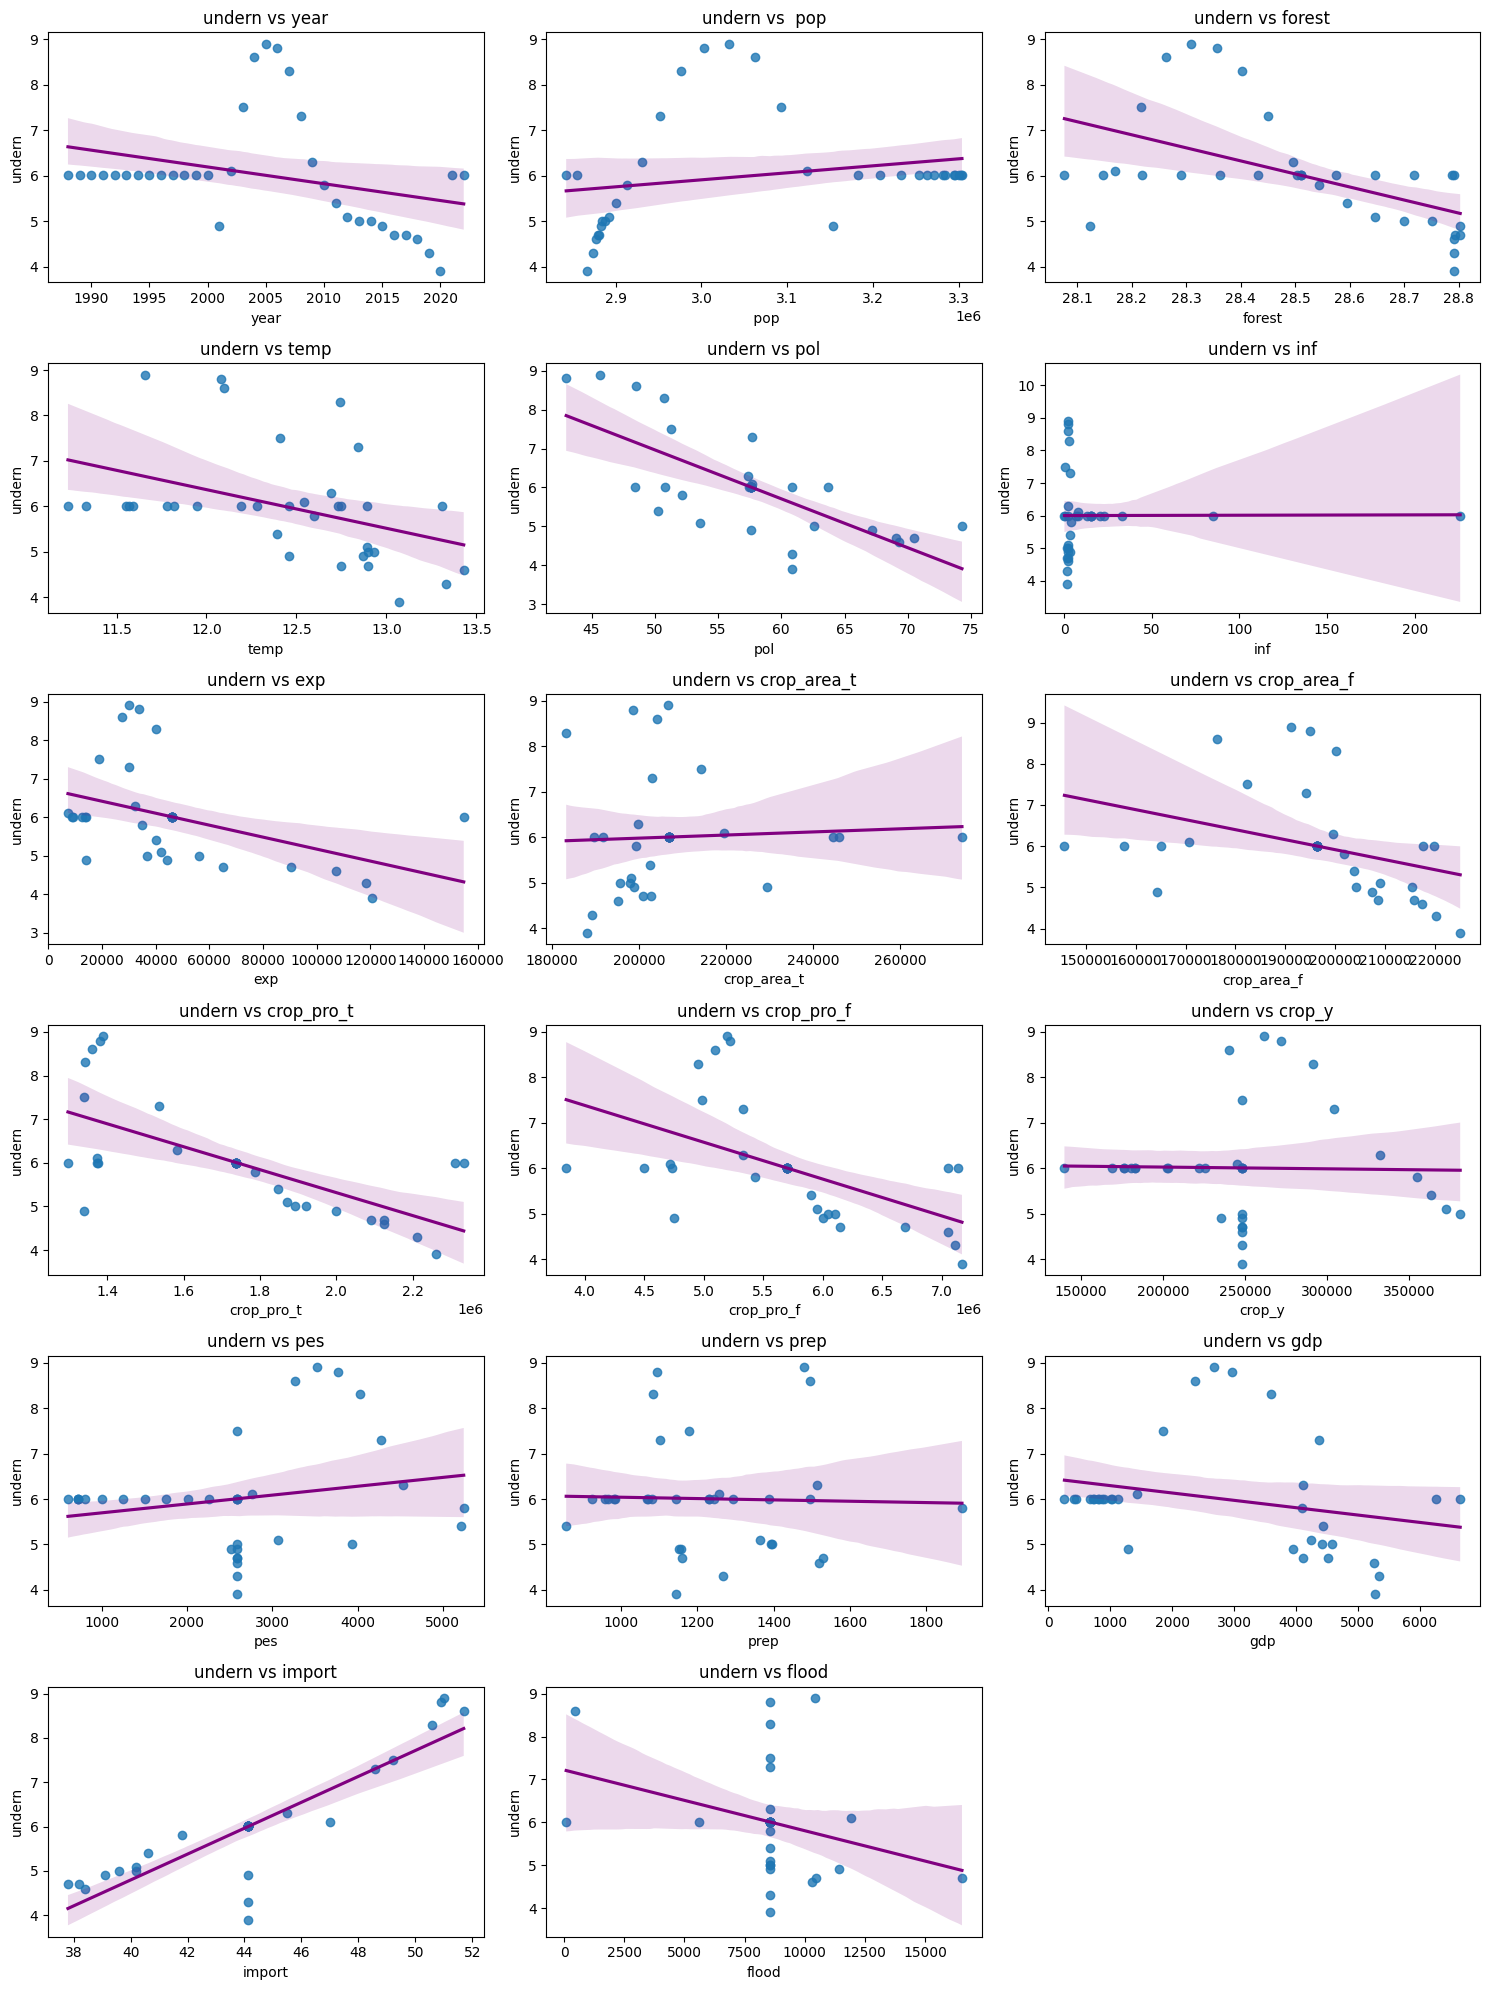

In [12]:
##using scatter plot to check the relationship between the features and target variables
# List of variables to plot against "undern"
variables = ['year', ' pop', 'forest', 'temp', 'pol', 'inf', 'exp', 'crop_area_t',
             'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y', 'pes', 'prep',
             'gdp', 'import', 'flood']
# Set the size of the overall figure
plt.figure(figsize=(15, 20))

# Loop through the variables and create a subplot for each
for i, var in enumerate(variables, 1):
    plt.subplot(6, 3, i)  # Adjust grid dimensions (rows, columns) as needed
    sns.regplot(x=var, y='undern', data=df_imputed, line_kws={'color': 'purple'})
    plt.title(f'undern vs {var}')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

from the scatter plot with all the features vs target, we can see that a linear regression model is able to capture some sort of trend between the feature and target variables eventhough the scatter plot itself shows that the data points do no strictly follow a linear regression, but it is a good starting point to make predictions. 

Some notes we made from the scatterplots: 

1)"prep" seems to not have any relationship with "undern" hence we might drop it.

2)"flood" seems to have a negative relationship with "undern" (as number of flood increases, the prevelence of undernourishment decreases) which does not really make sense. But looking at the data it seems that it might be because there is a lack of data about it(missing data) and it occurs randomly. 

3)"inf" does not seem to have a realtionship with "undern", and it may seem that why because of the outlier. However we cannot remove it as these are valid data due to their financial crisis

4)As "import" increases the "undern" also increases and this makes sense because after the Ukraine war the prices of imported good drastically increase and hence food was less affordable. 


### Checking Multicollinearity

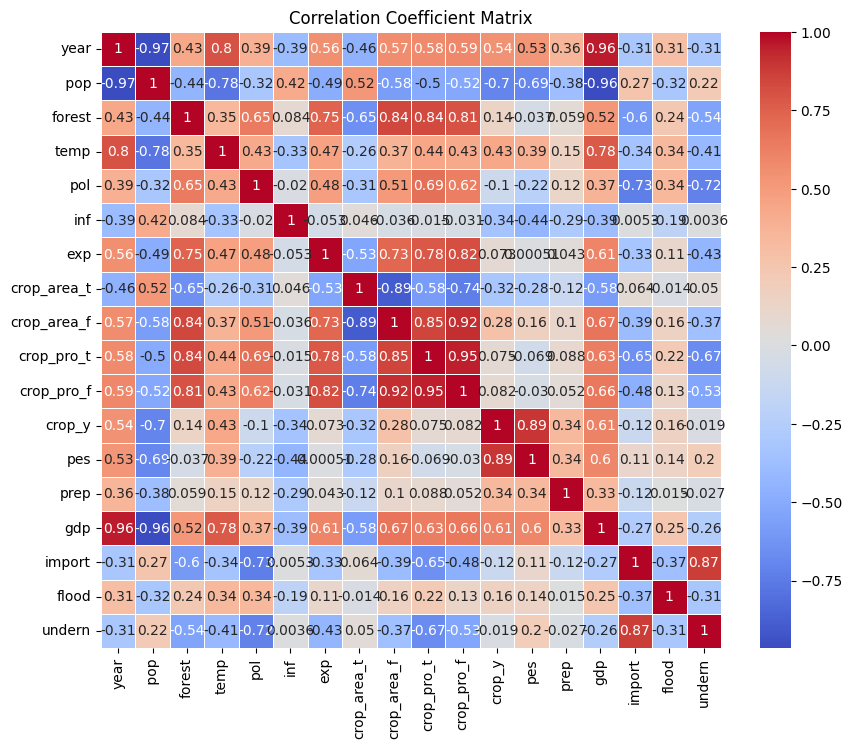

In [13]:
##checking correlation matrix to check for independency
# Define the numerical variables
numerical_vars = ['year', ' pop', 'forest', 'temp', 'pol', 'inf', 'exp', 'crop_area_t',
             'crop_area_f', 'crop_pro_t', 'crop_pro_f', 'crop_y', 'pes', 'prep',
             'gdp', 'import', 'flood','undern']
df_num=df_imputed[numerical_vars]
correlation_matrix = df_num.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

When making a multi-Linear regression, we cannot have multicollinearity. Hence we plan to drop if the correlation cofficient is above 0.7 or below -0.7 and keep the variable among the two that has a higher correlation to our target variable 'undern'. So from the correlation matrix we will drop, "crop_pro_f", "pes", "crop_area_f"," pop","forest","exp","temp",'pol".

### Removing Multicollinearity

In [ ]:
##dropping highly correlated variables
df_imputed= df_imputed.drop(["crop_pro_f", "pes", "crop_area_f"," pop","forest","exp","temp",'pol'], axis=1)

In [15]:
df_imputed.columns

Index(['year', 'undern', 'inf', 'crop_area_t', 'crop_pro_t', 'crop_y', 'prep',
       'gdp', 'import', 'flood'],
      dtype='object')

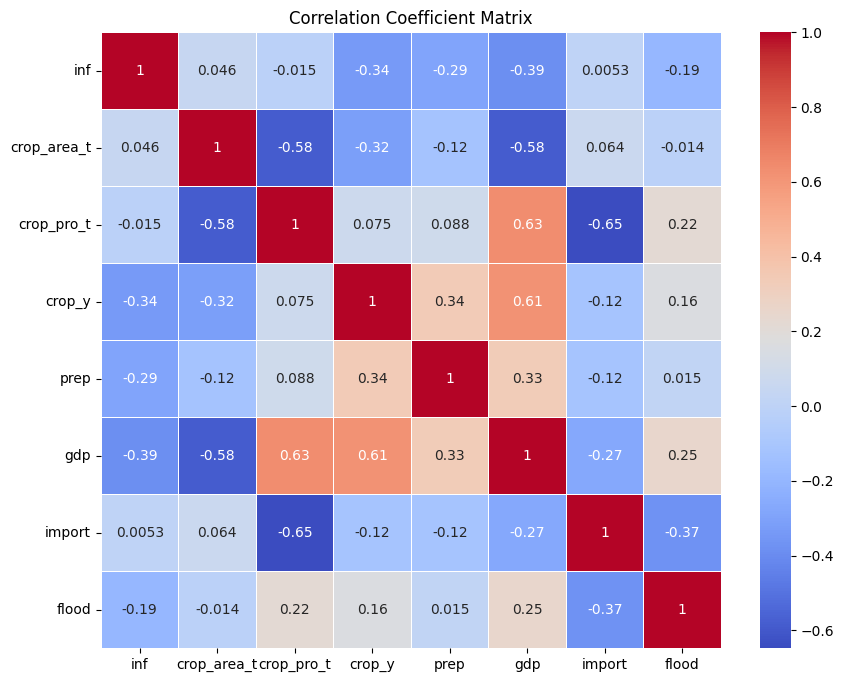

In [16]:
##checking correlation matrix to check for independency again
# Define the numerical variables
numerical_vars = ['inf', 'crop_area_t', 'crop_pro_t', 'crop_y',
       'prep', 'gdp', 'import', 'flood']
df_num=df_imputed[numerical_vars]
correlation_matrix = df_num.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

Now all the correlation values are less than 0.7 which we deem to be critical, hence we can proceed to train our model using the the Multiple linear regression learnt in week 9.

### Training Prediction Model

In [17]:
def normalize_z(dfin, columns_means=None, columns_stds=None):
    if columns_means is None:
        columns_means= dfin.mean(axis=0)
    if columns_stds is None:
        columns_stds= dfin.std(axis=0)
    dfout= (dfin- columns_means)/ columns_stds
        
    return dfout, columns_means, columns_stds

def get_features_targets(df, feature_names, target_names):
    df_feature = pd.DataFrame(df.loc[:, feature_names])
    df_target = pd.DataFrame(df.loc[:, target_names]) 

    return df_feature, df_target

def prepare_feature(df_feature):
    cols= df_feature.shape[1]
    if type(df_feature)==pd.DataFrame:
        np_feature= df_feature.to_numpy()
        
    else:
        np_feature= df_feature
    if np_feature.ndim == 1:
        np_feature= np_feature.reshape(-1,cols)
     # Add a column of ones for the intercept term
    ones = np.ones((np_feature.shape[0], 1)) ##X.shape[0] is to find the number of rows in matrix X,
    #and create a numpy array column vector of 1s 
    X = np.concatenate((ones, np_feature), axis=1)
    return X

def prepare_target(df_target):
    cols=df_target.shape[1] ##3 columns
    
    if type(df_target)==pd.DataFrame:
        np_target= df_target.to_numpy()
    else:
        np_target= df_target
        
    target= np_target.reshape(-1,cols)
    
    return target

def predict_linreg(df_feature, beta, means=None, stds=None):
    # Normalize the features using z normalization
    df_feature_normalized, means, stds = normalize_z(df_feature, means, stds)
    
    # Prepare the feature for prediction (add a column of ones for the intercept)
    X = prepare_feature(df_feature_normalized)

    # Calculate the predicted y values
    y_pred = calc_linreg(X, beta)

    return y_pred

def calc_linreg(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    test_index = np.random.choice(indexes, int(len(indexes) * test_size), replace = False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    
    df_feature_train = df_feature.loc[list(train_index), :]
    df_feature_test = df_feature.loc[list(test_index), :]
    df_target_train = df_target.loc[list(train_index), :]
    df_target_test = df_target.loc[list(test_index), :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    y_mean = np.mean(y)
    ss_res = np.sum(((y-ypred)**2))
    ss_tot = np.sum(((y-y_mean)**2))

    return 1 - (ss_res / ss_tot)
def mean_squared_error(target, pred):
    summation = np.sum(((target - pred)**2))
    n = target.size
    
    return (1/n) * summation

In [18]:
# Extract the features and the targets
df_features, df_target = get_features_targets(df_imputed, ['year', 'inf',
       'crop_area_t', 'crop_pro_t', 'crop_y', 'prep', 'gdp', 'import',
       'flood'], ['undern'])

# # Normalize using z normalization
# df_features,_,_ = normalize_z(df_features)

###
### YOUR CODE HERE
print(df_features.shape)

(35, 9)


In [19]:
df_features.describe()
display(df_features)

,year,inf,crop_area_t,crop_pro_t,crop_y,prep,gdp,import,flood
0,1988,15.061021,206958.12,1738560.32,248327.652174,1068.880000,805.05,44.141176,8576.792222
1,1989,15.061021,206958.12,1738560.32,248327.652174,1072.010000,860.78,44.141176,8576.792222
2,1990,15.061021,206958.12,1738560.32,176310.000000,958.690000,675.74,44.141176,8576.792222
3,1991,15.061021,206958.12,1738560.32,168855.000000,1143.450000,408.02,44.141176,8576.792222
4,1992,226.005421,206958.12,1738560.32,180438.000000,985.300000,259.75,44.141176,5620.000000
5,1993,85.004751,206958.12,1738560.32,202391.000000,1081.490000,452.62,44.141176,8576.792222
6,1994,22.565053,206958.12,1738560.32,139924.000000,924.330000,736.03,44.141176,8576.792222
7,1995,7.793219,206958.12,1738560.32,183117.000000,1386.940000,903.99,44.141176,78.000000
8,1996,12.725478,206958.12,1738560.32,175963.000000,1495.280000,1009.97,44.141176,8576.792222
9,1997,33.180274,206958.12,1738560.32,183020.000000,967.050000,717.38,44.141176,8576.792222


In [20]:
def compute_cost_linreg(X, y, beta):
    J=0
    m = y.shape[0]  # Number of training examples
    predictions = calc_linreg(X, beta)
    errors = predictions - y
    squared_errors = np.matmul(errors.T, errors)
    J = (1 / (2 * m)) * np.sum(squared_errors)
    return J

In [21]:
def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    J_storage = []
    m = y.shape[0]  ## number of training examples
    
    for i in range(num_iters):
        h = calc_linreg(X, beta)  ## calculate predicted value
        loss = h - y  ## calculate the errors
        gradient = np.matmul(X.T, loss) / m  ## caculate X_transposed * errors(loss) / m
        beta = beta - alpha * gradient
        J_storage.append(compute_cost_linreg(X, y, beta))
    
    return beta, J_storage

In [22]:
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
# display(df_features_test)

# Normalize the features using z normalization
df_features_train_z,_,_ = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)

target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((10,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

##changing the beta value of year to zero as it is just a time stamp
beta[1]=0

# call the predict() method
pred = predict_linreg(df_features_test, beta)

print("mean from custom linear regression:",pred.mean())
print("std from custom linear regression:",pred.std())

mean from custom linear regression: 6.129998261189031
std from custom linear regression: 0.9620895661951431


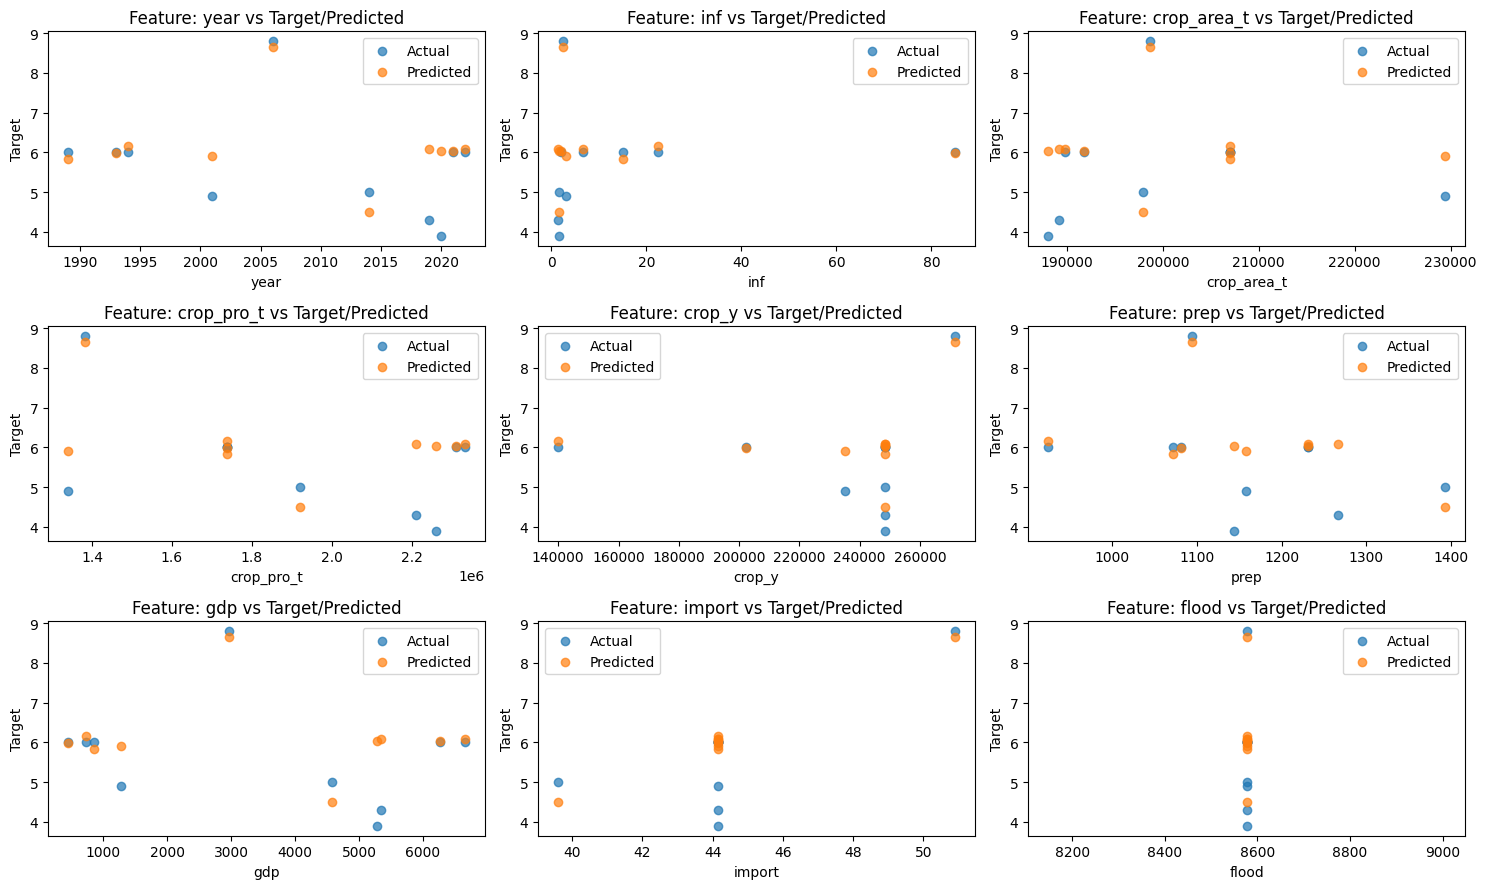

In [23]:
##Visualing how close our predicted values to the actual values


# Number of columns in df_features
n_columns = len(df_features.columns)

# Calculate the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3

# Setting up the subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 3 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each column and plot
for i, column in enumerate(df_features.columns):
    ax = axes[i]  # Get the corresponding subplot axis
    ax.scatter(df_features_test[column], df_target_test, label='Actual', alpha=0.7)
    ax.scatter(df_features_test[column], pred, label='Predicted', alpha=0.7)
    ax.set_title(f"Feature: {column} vs Target/Predicted")
    ax.set_xlabel(column)
    ax.set_ylabel('Target')
    ax.legend()

# Hide any unused subplots
for i in range(len(df_features.columns), n_rows*n_cols):
    axes[i].set_visible(False)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Some of the predicted results are close to the actual values, however there are some predicted points that are far from the actual value. Hence we will check the r-squared value and the mse to evaluate the accuracy of the model.

In [24]:
# Calculate the mse
mse = mean_squared_error(df_target_test, pred)

print(mse)


undern    0.910107
dtype: float64


The mse value is quite high hence it might indicate that the linear regression model may not be the best fit or maybe the data size is too small. Later on we will try to use other models to predict and comepare the mse value to see what is more suitable.

In [25]:
r2 = r2_score(df_target_test, pred)
print(r2)

undern    0.445211
dtype: float64


r-squared value is also alarmingly low which supports the statement we made above. But this maybe also be because we do not have alot of data, hence by increasing the dataset size we can increase the value of r-sqaured.

However we were not able to find more data about Albania for each features.

### Overall Model Result and Analysis

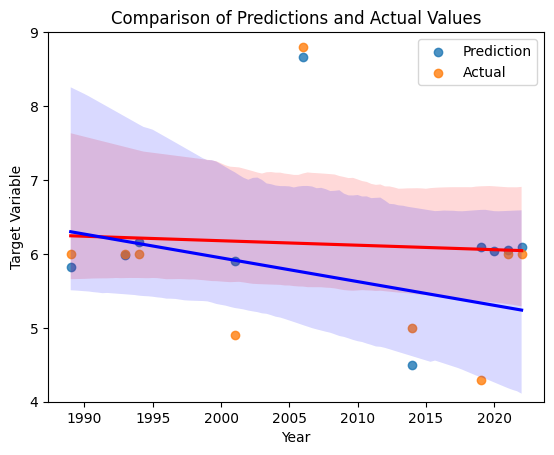

In [26]:
# Plotting the first regression line
sns.regplot(x=df_features_test["year"], y=pred, data=df_imputed, line_kws={'color': 'red'}, label='Prediction')

# Plotting the second regression line
sns.regplot(x=df_features_test["year"], y=df_target_test, data=df_imputed, line_kws={'color': 'blue'}, label='Actual')

# Set the range of the y-axis
plt.ylim([4, 9])  # Adjust y_min and y_max as per your data

# Add legend and labels
plt.legend()
plt.xlabel('Year')
plt.ylabel('Target Variable')  # Replace with your actual target variable name
plt.title('Comparison of Predictions and Actual Values')

# Show plot
plt.show()


While the model does start to deviate from the actual value more as time passes, considering that it is a simple linear regression model it is able to capture the trend and is still relatively close to the actual data (the confidence level- the colored area around the lines do overlap more than 70%).

### Using the beta coefficients to analyse feature importance

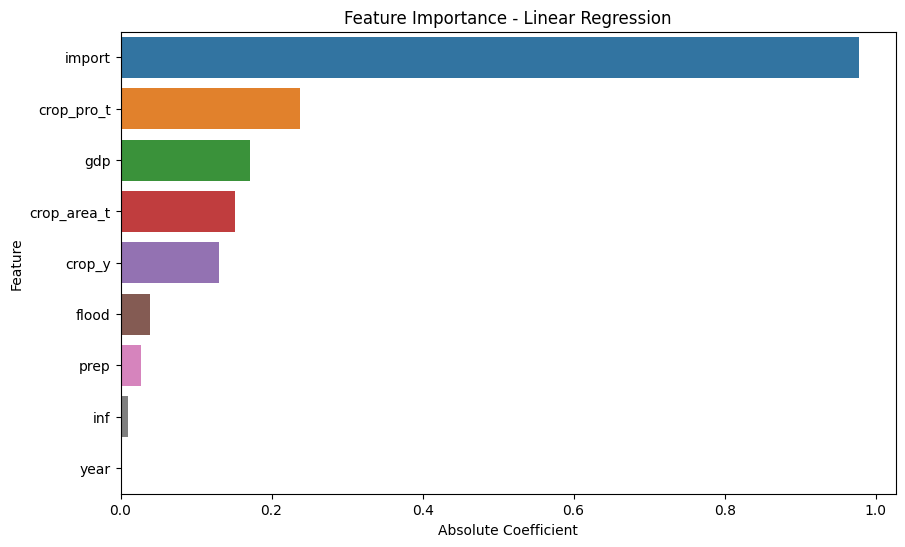

In [27]:

# feature_names = ['Intercept'] + list(df_features.columns)
feature_names =  list(df_features.columns)
coefficients = beta[1:].flatten() #exclude B0(intercept) # Adjust this if beta is not a 1D array

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# We use absolute values to understand the magnitude of influence
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()

# Sort by absolute coefficient values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

#### Performing feature analysis to help analyse the most important factor the government to consider to improve the food security issue in Albania.

The top 5 factors the government should consider shifting their policy or pay more close attention to are:

1) imports: Albania are overly reliant on imports as their food resource which are very suspectible to price increase and volaity (as we have seen from the Ukriane War and COVID-19). Hence they would have to shift their policies and help to advocate for self dependency and increase the amount of local crop productions and yield for local use as we can see from factor 2 and 4.
2) crop production level
3) GDP per capita
4) crop yeild

### Prediction with our linear regression model


Therefore, we propose leveraging key features such as projected GDP, expected import levels, and anticipated crop yields as inputs for a predictive model. This tool will enable the Albanian government to forecast the prevalence of undernourishment for any given year, based on these variables. By understanding the impact of these factors, policymakers can make informed decisions about which areas to focus on, adjusting policies to achieve desired levels of undernourishment reduction in a specific timeframe.

For example, if they want the percentage of undernourishment to be at 4% by 2044, they can experiment with the GDP per capita, crop yield and import ratio that they need to hit the 4%

In [28]:
future_year=input("What year do you want to predict the undernourishment in Albania?")

In [29]:
future_gdp= input("What is the predicted GDP per capita of that year? in US$")

In [30]:
future_import= input("What is the predicted ratio of food import of the year? ? (1-100)")

In [31]:
future_crop= input("What is the predicted annual crop yield of that year? (in hg/ha)")

#### Training Prediction Model

In [32]:
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
display(df_features_test)


# Normalize training data
df_features_train_z, columns_means, columns_stds = normalize_z(df_features_train,columns_means=None, columns_stds=None)


# Store the means and standard deviations
training_mean = columns_means
training_std = columns_stds

# Prepare features and targets
X_train = prepare_feature(df_features_train_z)
target_train = prepare_target(df_target_train)


# Gradient Descent
iterations = 1500
alpha = 0.01
beta = np.zeros((10, 1))
beta, J_storage = gradient_descent_linreg(X_train, target_train, beta, alpha, iterations)

beta[1]=0

# Update last known values to make prediction
last_known_values = df_features.iloc[-1].copy()
last_known_values['year'] = float(future_year)
last_known_values['gdp'] = float(future_gdp)
last_known_values['import'] = float(future_import)
last_known_values['crop_y']= float(future_crop)

# Convert to DataFrame
X_future = pd.DataFrame([last_known_values])


# Make prediction
pred = predict_linreg(X_future, beta,training_mean, training_std)
print(pred)



,year,inf,crop_area_t,crop_pro_t,crop_y,prep,gdp,import,flood
32,2020,1.620887,188030.00,2260838.00,248327.652174,1143.640000,5278.99,44.141176,8576.792222
33,2021,2.041472,191741.00,2311224.00,248327.652174,1231.348485,6259.76,44.141176,8576.792222
34,2022,6.725203,189778.00,2333808.00,248327.652174,1231.348485,6657.64,44.141176,8576.792222
1,1989,15.061021,206958.12,1738560.32,248327.652174,1072.010000,860.78,44.141176,8576.792222
5,1993,85.004751,206958.12,1738560.32,202391.000000,1081.490000,452.62,44.141176,8576.792222
6,1994,22.565053,206958.12,1738560.32,139924.000000,924.330000,736.03,44.141176,8576.792222
13,2001,3.107588,229424.00,1340063.00,235173.000000,1158.260000,1283.57,44.141176,8576.792222
18,2006,2.370728,198714.00,1382241.00,271643.000000,1094.500000,2972.74,50.900000,8576.792222
26,2014,1.625865,197967.00,1920721.00,248327.652174,1392.780000,4584.92,39.600000,8576.792222
31,2019,1.411091,189174.00,2210124.00,248327.652174,1266.270000,5345.06,44.141176,8576.792222


[[4.86302527]]


We kept the values of the rest if the features (inf, crop area, prep, flood) to be the same as 2022 as we are asssuming that it would not change as much and its change also has a lesser weightage on prevelence of undernourishment as compared to the key features.

In [33]:
def get_pred(value):
    pred= value.flatten()[0]
    return f"The predicted percentage of undernourishment in Albania (% of its population) in {future_year} is {pred.round(1)}"
get_pred(pred)

'The predicted percentage of undernourishment in Albania (% of its population) in 2030 is 4.9'

#### Visualising the predicted value with the past trend

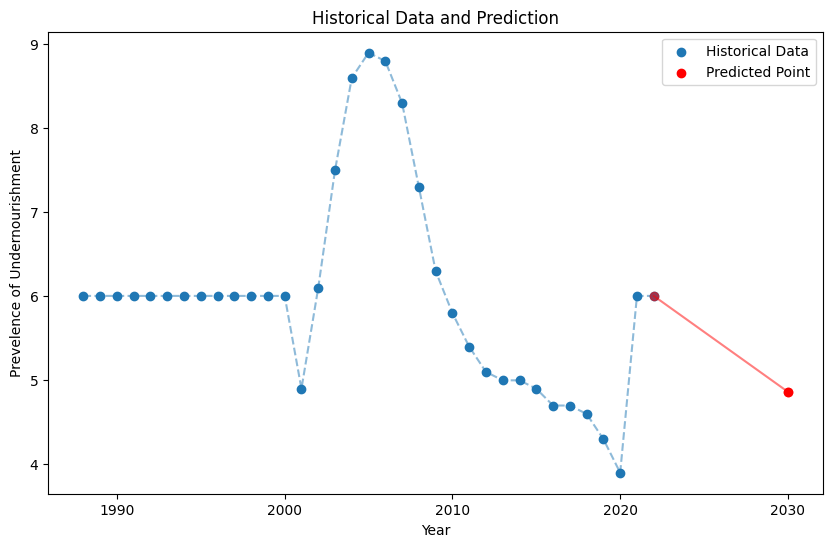

In [34]:
# Assuming df_features_test contains your historical data and 'year' is your x-axis
x_historical = df_features['year']
y_historical = df_target  

# Plot historical data
plt.figure(figsize=(10, 6))
plt.scatter(x_historical, y_historical, label='Historical Data')
plt.plot(x_historical, y_historical, linestyle='--', alpha=0.5)

# Add predicted point
# 'pred' is your predicted value, and 'future_year' is the year of prediction
x_future = last_known_values["year"]
y_future = pred.flatten()[0]
plt.scatter(x_future, y_future, color='red', label='Predicted Point')

# Connect the last known point to the predicted point
last_known_year = x_historical.iloc[-1]
last_known_value = y_historical.iloc[-1]

# Ensure these are scalar values for plotting
last_known_year = float(last_known_year)
last_known_value = float(last_known_value)
x_future = float(x_future)
y_future = float(y_future)

plt.plot([last_known_year, x_future], [last_known_value, y_future], color='red', linestyle='-', marker='o',alpha=0.5)

# Labeling the plot
plt.xlabel('Year')
plt.ylabel('Prevelence of Undernourishment')  # Replace with your target variable name
plt.title('Historical Data and Prediction')
plt.legend()

# Show plot
plt.show()


It is now easy for policy makers to compare the % for the year they want to predict with the expected gdp, import and crop yield with the past trend and see where the country is heading.

### Future Forecasting

We will now utilize the sklearn Linear Regression model to forecast the key features—GDP, imports, and crop yield—from 2023 to 2100. This will allow us to generate a projected graph of the prevalence of undernourishment. This graph will serve as a valuable tool for the government, enabling them to assess potential changes in undernourishment percentages based on the anticipated trends of these key economic and agricultural indicators.

Furthermore, to offer flexibility and adaptability to the government's planning processes, our model is designed to incorporate alternate data sets. If the government prefers to use their own projections for GDP, imports, and crop yield, they can easily integrate this data into our model by replacing the data in the 'future_forecast' DataFrame. This feature ensures that our predictive model remains relevant and aligned with the government's realistic expectations and objectives.

In [1137]:
def train_gdp_model(df_i):
    df_feature_year, df_target_gdp = get_features_targets(df_i, "year", "gdp")
    df_feature_year_train, df_feature_year_test, df_target_gdp_train, df_target_gdp_test = split_data(df_feature_year, df_target_gdp, random_state=100, test_size=0.3)

    lr = LinearRegression()
    lr.fit(df_feature_year_train, df_target_gdp_train)
    return lr

def train_import_model(df):
    df_feature_year, df_target_import = get_features_targets(df, "year", "import")
    df_feature_year_train, df_feature_year_test, df_target_import_train, df_target_import_test = split_data(df_feature_year, df_target_import, random_state=100, test_size=0.3)

    lr_import = LinearRegression()
    lr_import.fit(df_feature_year_train, df_target_import_train)
    return lr_import

def train_crop_yield_model(df):
    df_feature_year, df_target_crop_yield = get_features_targets(df, "year", "crop_y")
    df_feature_year_train, df_feature_year_test, df_target_crop_yield_train, df_target_crop_yield_test = split_data(df_feature_year, df_target_crop_yield, random_state=100, test_size=0.3)

    lr_crop_yield = LinearRegression()
    lr_crop_yield.fit(df_feature_year_train, df_target_crop_yield_train)
    return lr_crop_yield


# Train the model once using all available historical data
gdp_forecasting_model = train_gdp_model(df_imputed)
import_forecasting_model = train_import_model(df_imputed)
crop_yield_forecasting_model = train_crop_yield_model(df_imputed)


years = range(2023, 2101)
future_years = np.array(years).reshape(-1, 1)  # Reshape for prediction

# Predict future values
future_import_predictions = import_forecasting_model.predict(future_years)
future_crop_yield_predictions = crop_yield_forecasting_model.predict(future_years)
future_gdp_predictions=gdp_forecasting_model.predict(future_years)

# Combine future years and predictions into a DataFrame
future_forecasts = pd.DataFrame({
    'year': years,
    'gdp': future_gdp_predictions.flatten(),
    'import': future_import_predictions.flatten(),
    'crop_y': future_crop_yield_predictions.flatten()
})
# Predict future GDP for all years in one step
future_gdp_predictions = gdp_forecasting_model.predict(future_years)

# Combine future years and predictions
# future_forecasts_gdp = pd.DataFrame({'year': years, 'gdp': future_gdp_predictions.flatten()})
display(future_forecasts)

,year,gdp,import,crop_y
0,2023,5918.000795,40.560312,346534.147109
1,2024,6094.889667,40.378049,351358.745783
2,2025,6271.778539,40.195786,356183.344456
3,2026,6448.667412,40.013523,361007.943130
4,2027,6625.556284,39.831260,365832.541804
...,...,...,...,...
73,2096,18830.888478,27.255114,698729.850286
74,2097,19007.777351,27.072851,703554.448960
75,2098,19184.666223,26.890588,708379.047633
76,2099,19361.555095,26.708325,713203.646307


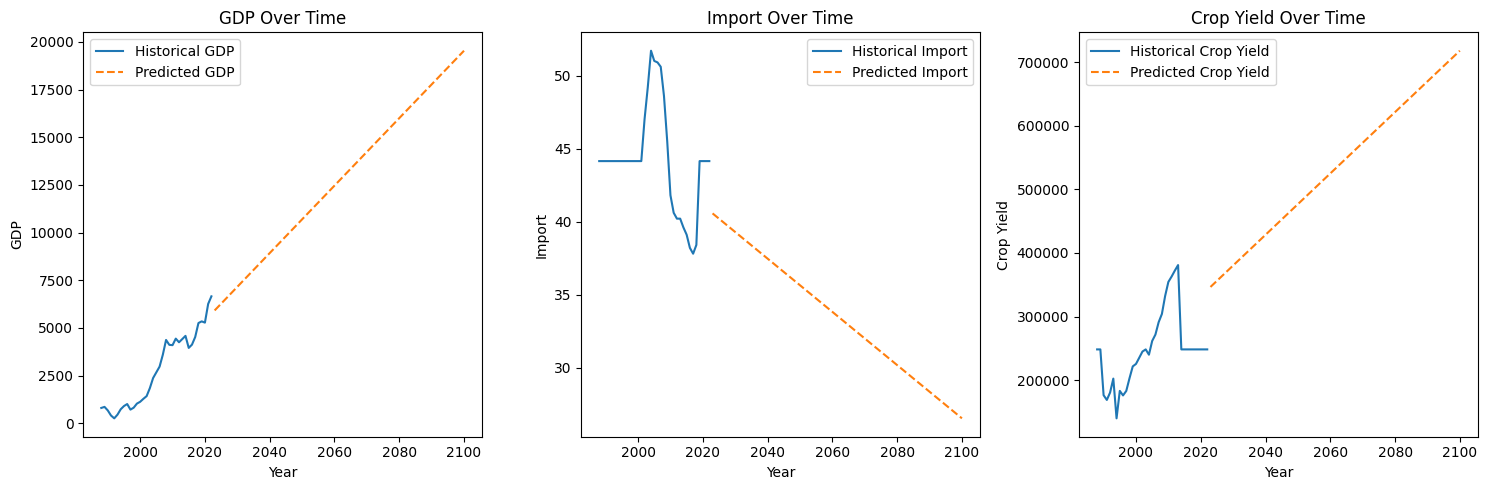

In [1123]:
import matplotlib.pyplot as plt

# Extract historical data
historical_years = df_imputed['year']
historical_gdp = df_imputed['gdp']
historical_import = df_imputed['import']
historical_crop_y = df_imputed['crop_y']

# Future data from your predictions
future_years = future_forecasts['year']
future_gdp = future_forecasts['gdp']
future_import = future_forecasts['import']
future_crop_y = future_forecasts['crop_y']

# Plotting
plt.figure(figsize=(15, 5))

# GDP Plot
plt.subplot(1, 3, 1)
plt.plot(historical_years, historical_gdp, label='Historical GDP')
plt.plot(future_years, future_gdp, label='Predicted GDP', linestyle='--')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Over Time')
plt.legend()

# Import Plot
plt.subplot(1, 3, 2)
plt.plot(historical_years, historical_import, label='Historical Import')
plt.plot(future_years, future_import, label='Predicted Import', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Import')
plt.title('Import Over Time')
plt.legend()

# Crop Yield Plot
plt.subplot(1, 3, 3)
plt.plot(historical_years, historical_crop_y, label='Historical Crop Yield')
plt.plot(future_years, future_crop_y, label='Predicted Crop Yield', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.title('Crop Yield Over Time')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


These graph presents the forecasted trends of GDP, imports, and crop yield from 2023 to 2100, derived using a linear regression model. These projections form the basis for our predictive analysis of the prevalence of undernourishment. 

In [975]:
last_historical_data = df_features.iloc[-1].copy()

# Create a DataFrame for future years with non-changing features
non_changing_features = last_historical_data.drop(['gdp', 'import', 'crop_y', 'year'])
future_data_consistent = pd.DataFrame([non_changing_features] * len(future_forecasts), columns=non_changing_features.index)

# Reset the index to align with future_forecasts
future_data_consistent = future_data_consistent.reset_index(drop=True)

# Merge the consistent data with the future forecasts
combined_future_data = pd.concat([future_forecasts, future_data_consistent], axis=1)

# Ensure 'year' is from future_forecasts and drop any duplicate 'year' column if exists
combined_future_data = combined_future_data.loc[:,~combined_future_data.columns.duplicated()]
combined_future_data['year'] = future_forecasts['year']

# Reorder columns in combined_future_data
column_order=df_features.columns
combined_future_data = combined_future_data[column_order]
display(combined_future_data)


,year,inf,crop_area_t,crop_pro_t,crop_y,prep,gdp,import,flood
0,2023,6.725203,189778.0,2333808.0,346534.147109,1231.348485,5918.000795,40.560312,8576.792222
1,2024,6.725203,189778.0,2333808.0,351358.745783,1231.348485,6094.889667,40.378049,8576.792222
2,2025,6.725203,189778.0,2333808.0,356183.344456,1231.348485,6271.778539,40.195786,8576.792222
3,2026,6.725203,189778.0,2333808.0,361007.943130,1231.348485,6448.667412,40.013523,8576.792222
4,2027,6.725203,189778.0,2333808.0,365832.541804,1231.348485,6625.556284,39.831260,8576.792222
...,...,...,...,...,...,...,...,...,...
73,2096,6.725203,189778.0,2333808.0,698729.850286,1231.348485,18830.888478,27.255114,8576.792222
74,2097,6.725203,189778.0,2333808.0,703554.448960,1231.348485,19007.777351,27.072851,8576.792222
75,2098,6.725203,189778.0,2333808.0,708379.047633,1231.348485,19184.666223,26.890588,8576.792222
76,2099,6.725203,189778.0,2333808.0,713203.646307,1231.348485,19361.555095,26.708325,8576.792222


In [976]:
#training the model with training data from df_features
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)


# Normalize training data
df_features_train_z, columns_means, columns_stds = normalize_z(df_features_train,columns_means=None, columns_stds=None)


# Store the means and standard deviations
training_mean = columns_means
training_std = columns_stds

# Prepare features and targets
X_train = prepare_feature(df_features_train_z)
target_train = prepare_target(df_target_train)


# Gradient Descent
iterations = 1500
alpha = 0.01
beta = np.zeros((10, 1))
beta, J_storage = gradient_descent_linreg(X_train, target_train, beta, alpha, iterations)

beta[1]=0
## assigning the future dataframe for the features to get the predicted target values
X_future = combined_future_data


# Make prediction
pred = predict_linreg(X_future, beta,training_mean, training_std)


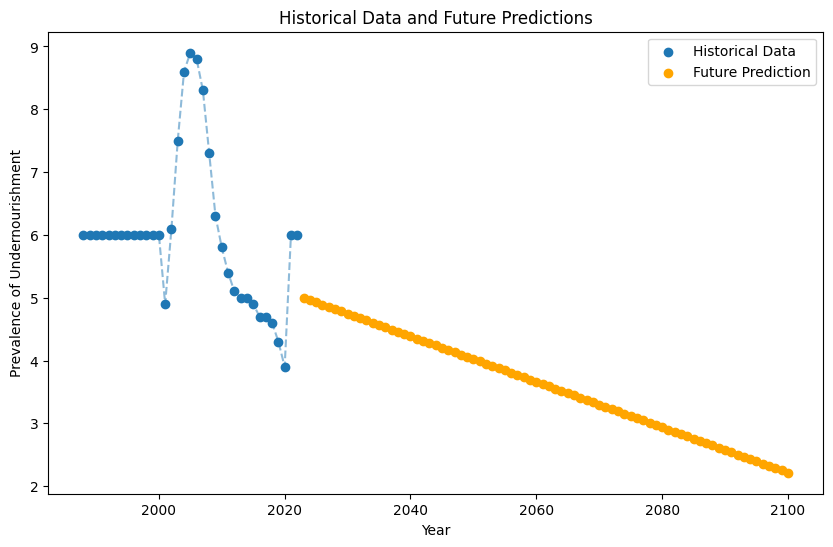

In [977]:
## visualising the historical and future trends

# Historical Data
x_historical = df_features['year']
y_historical = df_target

# Future Data
x_future = combined_future_data['year']
y_future = pred  # Assuming 'pred' is an array of predictions

# Plot Historical Data
plt.figure(figsize=(10, 6))
plt.scatter(x_historical, y_historical, label='Historical Data')
plt.plot(x_historical, y_historical, linestyle='--', alpha=0.5)

# Plot Future Data
plt.scatter(x_future, y_future, label='Future Prediction', color='orange')
plt.plot(x_future, y_future, linestyle='--', alpha=0.5, color='orange')

# # Connect the last known point to the first predicted point
# last_known_year = x_historical.iloc[-1]
# last_known_value = y_historical.iloc[-1]
# first_future_year = x_future.iloc[0]
# first_future_value = y_future.flatten()[0]

# plt.plot([last_known_year, first_future_year], [last_known_value, first_future_value], color='red', linestyle='-', marker='o', alpha=0.5)

# Labeling the Plot
plt.xlabel('Year')
plt.ylabel('Prevalence of Undernourishment')
plt.title('Historical Data and Future Predictions')
plt.legend()

# Show Plot
plt.show()


As the graph indicated, there's a strong correlation between Albania's economic health and its food security. With an increase in GDP, a decrease in the ratio of food imports, and an enhancement in crop yield, there's a marked decline in the prevalence of undernourishment. 

Notably, our feature analysis highlights the critical role of food imports in determining food security. This underscores the necessity for Albania to focus on bolstering its self-reliance in food production, reducing dependency on imports, and thereby enhancing its overall food security.

### Limitations of our prediction model

#### Data Scarcity and Uniqueness:

- Albania's unique historical and geographical characteristics make finding comprehensive and comparable datasets challenging.
- The limited availability of extensive data specific to Albania restricts the depth and breadth of our analysis, potentially affecting the model's reliability and generalizability.

#### Imputation of Missing Data:

- To handle missing data, we used mean imputation, a necessary but imperfect solution.
- Attempts to supplement data with information from similar countries often fell short due to Albania's distinct context, limiting the accuracy and relevance of such substitutions.
- While this method helps in maintaining the dataset's structure, it may not accurately reflect the true variation and complexity of Albania's socio-economic conditions, leading to potential biases in our predictions.

#### Regional Variations in Food Security:

- Albania's diverse geographical landscape means that food security varies significantly across different regions.
- Our model, being national in scope, does not account for these regional disparities, which limits its utility in guiding localized policy interventions.

#### Impact of Outliers:

- Our dataset includes outliers representing significant, real-world events and disruptions in Albania.
- While these outliers are crucial for a realistic understanding, they complicate linear modeling and can skew results, affecting the precision of our predictions.

#### Modeling Complexities and Alternative Approaches:

- The linear regression model may not fully capture the complex and non-linear patterns in the data, as indicated by the low R-squared and high MSE values in our analysis.
- Exploring advanced machine learning techniques like XGBoost or regularization methods like Lasso regression could potentially provide more nuanced and accurate predictions, accommodating the unpredictable and dynamic nature of the factors affecting food security in Albania.

#### Socio-Economic Discrepancies:

- Our model assumes a uniform impact of economic changes across all population segments, which may not be the case in reality.
- The varying socio-economic statuses in Albania mean that improvements in GDP per capita may not equitably translate to better food security for all, especially for lower-income groups. This aspect remains unaddressed in our current model framework

#### Cross Checking with Linear Regression from sklearn

In [978]:
df_features_dropped=df_features.drop('year',axis=1)
# Normalize the features using z normalization
df_features_z,_,_ = normalize_z(df_features_dropped)

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features_z, df_target, random_state=100, test_size=0.3)



mean from sklearn linear regression: 6.517271529790014
std from sklearn linear regression: 0.8782588570503421


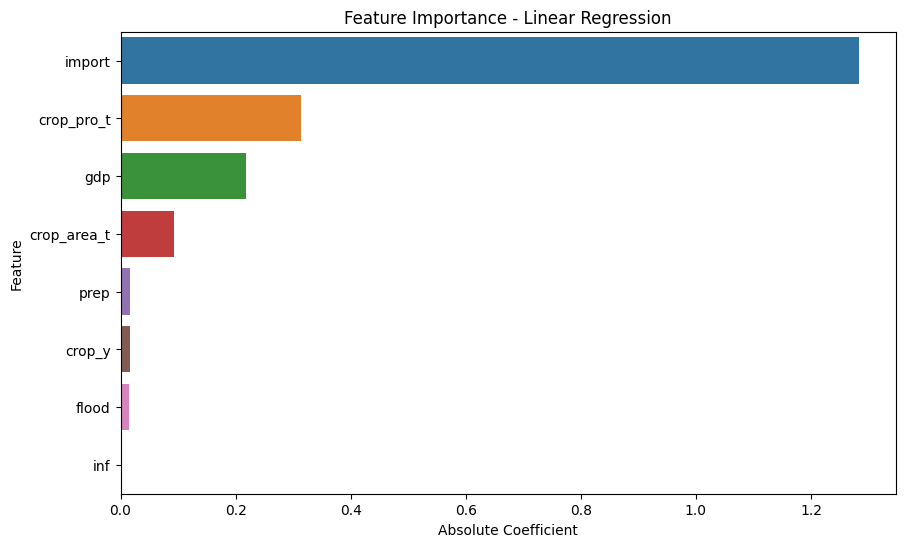

r^2 value from sklearn linear regression: undern   -0.208359
dtype: float64
mse value from sklearn linear regression: undern    1.982259
dtype: float64


In [979]:
lr = LinearRegression()
lr.fit(df_features_train, df_target_train)

# Predictions (for your reference)
lr_pred = lr.predict(df_features_test)
print("mean from sklearn linear regression:",lr_pred.mean())
print("std from sklearn linear regression:",lr_pred.std())

# Extract coefficients
coefficients = lr.coef_.flatten()  # Adjust if necessary

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': df_features_train.columns, 
    'Coefficient': coefficients
})

# We use absolute values to understand the magnitude of influence
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()

# Sort by absolute coefficient values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

lr_r2 = r2_score(df_target_test, lr_pred)
lr_mse = mean_squared_error(df_target_test, lr_pred)
print("r^2 value from sklearn linear regression:",lr_r2)
print("mse value from sklearn linear regression:",lr_mse)


When checking with the LinearRegression(LR) from sklearn our analyses still stands that linear regression model might not be the best fit (negative r-sqaured value and high mse value). Nevertheless, the mean and std from sklearn's LR is about the same as our model, showing that our model is quite reliable.

### Future Potential Expansion of our model

#### Geospatial Analysis:

If we can obtain geographically disaggregated data, performing a geospatial analysis could reveal regional differences in undernourishment and the impact of local factors like climate, soil quality, and access to markets.

#### Socio-Demographic Data:

Including socio-demographic variables (like age distribution, urban/rural split, education levels) might provide deeper insights into the vulnerability of different population groups to food insecurity.

### Prediction with other models as Linear regression does give high MSE and low R-squared value

In [980]:
# Extract the features and the targets
df_features, df_target = get_features_targets(df_imputed, ['inf',
       'crop_area_t', 'crop_pro_t', 'crop_y', 'prep', 'gdp', 'import',
       'flood'], ['undern'])

# # Normalize using z normalization
# df_features,_,_ = normalize_z(df_features)

###
### YOUR CODE HERE
print(df_features.shape)

(35, 8)


In [981]:
# Normalize the features using z normalization
df_features_z,_,_ = normalize_z(df_features)

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features_z, df_target, random_state=100, test_size=0.3)

In [985]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(df_features_train, df_target_train)

# Predictions
lasso_pred = lasso.predict(df_features_test)
print("mean from Lasso regression:", lasso_pred.mean())
print("std from Lasso regression:", lasso_pred.std())

# Extract coefficients
coefficients = lasso.coef_.flatten()

# Performance Metrics
lasso_r2 = r2_score(df_target_test, lasso_pred)
lasso_mse = mean_squared_error(df_target_test, lasso_pred)
print("R^2 value from Lasso regression:", lasso_r2)
print("MSE value from Lasso regression:", lasso_mse)


mean from Lasso regression: 6.210247983790117
std from Lasso regression: 0.6630813527243868
R^2 value from Lasso regression: 0.3295224109946632
MSE value from Lasso regression: 1.0998891513687368


R^2 value from XGBoost: 0.6499568342893005
MSE value from XGBoost: 0.574230498959903


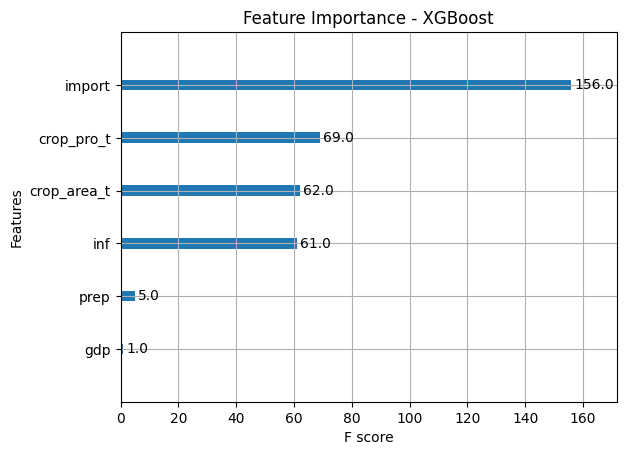

In [983]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Convert your dataset into DMatrix, which is optimized for XGBoost
dtrain = xgb.DMatrix(df_features_train, label=df_target_train)
dtest = xgb.DMatrix(df_features_test, label=df_target_test)

# Set XGBoost parameters
params = {
    'max_depth': 3,  # maximum depth of a tree
    'eta': 0.1,      # learning rate
    'objective': 'reg:squarederror', # regression task
    'eval_metric': 'rmse' # root mean squared error
}
num_rounds = 100

# Train the model
bst = xgb.train(params, dtrain, num_rounds)

# Predictions
xgb_pred = bst.predict(dtest)

# Performance Metrics
xgb_r2 = r2_score(df_target_test, xgb_pred)
xgb_mse = mean_squared_error(df_target_test, xgb_pred)
print("R^2 value from XGBoost:", xgb_r2)
print("MSE value from XGBoost:", xgb_mse)

import matplotlib.pyplot as plt

xgb.plot_importance(bst)
plt.title('Feature Importance - XGBoost')
plt.show()

R^2 value from Random Forest: 0.6542908527734281
MSE value from Random Forest: 0.5671207312500004


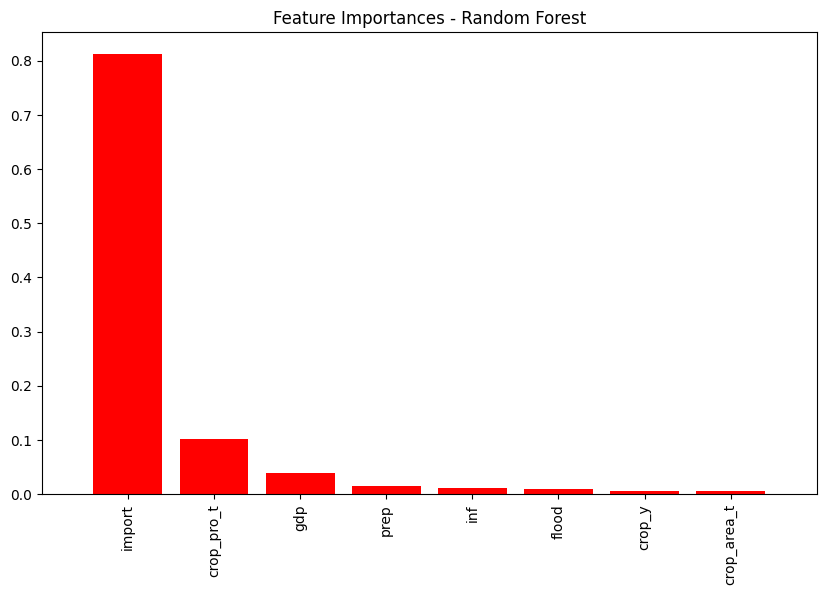

In [986]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(df_features_train, df_target_train)

# Make predictions
rf_pred = rf_model.predict(df_features_test)

# Performance Metrics
rf_r2 = r2_score(df_target_test, rf_pred)
rf_mse = mean_squared_error(df_target_test, rf_pred)
print("R^2 value from Random Forest:", rf_r2)
print("MSE value from Random Forest:", rf_mse)

# Feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = df_features_train.columns
sorted_features = [feature_names[i] for i in indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(df_features_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(df_features_train.shape[1]), sorted_features, rotation='vertical')
plt.xlim([-1, df_features_train.shape[1]])
plt.show()

As our analysis shows, advanced machine learning models like XGBoost and RandomForest demonstrate superior performance in capturing the trends and nuances of Albania's food security situation, as evidenced by higher r-squared values and lower MSE (Mean Squared Error) values. This indicates a more accurate and reliable prediction capability compared to Linear Regression (LR).

However, it's important to note that despite the comparatively lower predictive power of Linear Regression, it still effectively identifies and utilizes the top five key features critical for predicting undernourishment in Albania. This suggests that even with its limitations, our Linear Regression model serves as a valuable foundational tool. It provides essential insights into the primary factors influencing food security and can be a starting point for more complex analyses.